#NYC Taxi

##Settings

Montamos una conexión con Google Drive

In [5]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


Descomprimimos los históricos almacenados en la nube

In [6]:
!unzip /content/drive/MyDrive/Datasets/drive-download-20230527T193458Z-001.zip
!unzip /content/drive/MyDrive/Datasets/drive-download-20230527T193458Z-002.zip
!unzip /content/drive/MyDrive/Datasets/drive-download-20230527T193458Z-003.zip
!unzip /content/drive/MyDrive/Datasets/drive-download-20230527T193458Z-004.zip

Archive:  /content/drive/MyDrive/Datasets/drive-download-20230527T193458Z-001.zip
  inflating: yellow_tripdata_2016-01.csv  
Archive:  /content/drive/MyDrive/Datasets/drive-download-20230527T193458Z-002.zip
  inflating: yellow_tripdata_2016-02.csv  
Archive:  /content/drive/MyDrive/Datasets/drive-download-20230527T193458Z-003.zip
  inflating: yellow_tripdata_2016-03.csv  
Archive:  /content/drive/MyDrive/Datasets/drive-download-20230527T193458Z-004.zip
  inflating: yellow_tripdata_2015-01.csv  


##Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score

##Datos

###2015-01

In [2]:
df_2015_1 = pd.read_csv('/content/yellow_tripdata_2015-01.csv')

####Análisis

Observamos las características de los datos

In [8]:
df_2015_1.shape

(12748986, 19)

In [9]:
df_2015_1.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9156272,2,2015-01-19 09:49:16,2015-01-19 09:57:15,1,1.54,-73.956200,40.771584,1,N,-73.972481,40.781128,1,7.5,0.0,0.5,1.50,0.0,0.3,9.80
7447163,1,2015-01-19 14:24:06,2015-01-19 14:50:06,1,5.70,-74.008644,40.704292,1,N,-73.985832,40.759895,1,22.0,0.0,0.5,4.55,0.0,0.3,27.35
2566348,2,2015-01-03 15:26:28,2015-01-03 15:43:36,1,6.49,-74.013504,40.705528,1,N,-73.978661,40.761517,1,20.5,0.0,0.5,4.10,0.0,0.3,25.40
4829401,2,2015-01-01 02:54:32,2015-01-01 03:01:28,1,1.35,-73.981773,40.771259,1,N,-73.961594,40.764141,1,7.0,0.5,0.5,1.50,0.0,0.3,9.80
11103780,2,2015-01-06 07:07:12,2015-01-06 07:15:38,1,1.44,-73.981575,40.740986,1,N,-73.970833,40.758282,1,8.0,0.0,0.5,1.25,0.0,0.3,10.05


In [6]:
df_2015_1.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274898e+07,1.274899e+07
mean,1.521437e+00,1.681491e+00,1.345913e+01,-7.256184e+01,3.997282e+01,1.036901e+00,-7.260904e+01,3.999961e+01,1.386712e+00,1.190566e+01,3.082790e-01,4.977986e-01,1.853814e+00,2.434984e-01,2.831431e-01,1.510829e+01
std,4.995402e-01,1.337924e+00,9.844094e+03,1.012510e+01,5.578691e+00,6.732240e-01,9.966037e+00,5.487742e+00,4.988611e-01,1.030254e+01,5.916643e-01,3.534229e-02,1.106432e+03,1.527171e+00,6.908633e-02,1.106503e+03
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.219258e+02,0.000000e+00,1.000000e+00,-7.401667e+02,-9.029157e+00,1.000000e+00,-4.500000e+02,-7.900000e+01,-5.000000e-01,-9.242000e+01,-2.600000e+01,0.000000e+00,-4.503000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399168e+01,4.073554e+01,1.000000e+00,-7.399120e+01,4.073436e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.160000e+00
50%,2.000000e+00,1.000000e+00,1.680000e+00,-7.398160e+01,4.075314e+01,1.000000e+00,-7.397976e+01,4.075362e+01,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01
75%,2.000000e+00,2.000000e+00,3.000000e+00,-7.396662e+01,4.076757e+01,1.000000e+00,-7.396246e+01,4.076880e+01,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.060000e+00,0.000000e+00,3.000000e-01,1.630000e+01
max,2.000000e+00,9.000000e+00,1.542000e+07,7.866265e+01,4.047000e+02,9.900000e+01,8.527402e+01,4.595333e+02,5.000000e+00,4.008000e+03,9.999900e+02,5.000000e-01,3.950589e+06,1.450090e+03,3.000000e-01,3.950612e+06


In [ ]:
df_2015_1.dtypes

In [12]:
df_2015_1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

Observamos si existen variables unuarias 

In [19]:
ls_unary = []
for column in df_2015_1.columns:
    if df_2015_1[column].nunique() == 1:
        ls_unary.append(column)
ls_unary

[]

Indenifiquemos las variables multicoloniales

In [4]:
corr_mat = df_2015_1.corr()
corr_mat

<ipython-input-4-336e829c669e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df_2015_1.corr()


,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
VendorID,1.000000,0.299074,-1.127180e-03,-0.076099,0.076142,-0.005358,-0.069818,0.069862,-0.014171,0.010222,0.003953,0.003829,2.626123e-04,0.005000,0.240147,0.000367
passenger_count,0.299074,1.000000,-3.853714e-04,-0.028097,0.028075,-0.006360,-0.026389,0.026376,0.012615,0.007493,0.003040,0.005990,-1.619081e-04,0.006322,0.044674,-0.000082
trip_distance,-0.001127,-0.000385,1.000000e+00,-0.000154,0.000155,0.000049,-0.000152,0.000152,0.001084,0.000442,0.000053,0.000034,-7.987485e-07,-0.000007,-0.000567,0.000003
pickup_longitude,-0.076099,-0.028097,-1.539745e-04,1.000000,-0.999780,0.033864,0.891823,-0.892203,0.003591,0.015645,-0.001964,-0.044669,-2.212793e-05,0.000610,-0.019965,0.000121
pickup_latitude,0.076142,0.028075,1.554262e-04,-0.999780,1.000000,-0.033861,-0.891656,0.892067,-0.003277,-0.015356,0.001790,0.044685,2.095260e-05,0.000008,0.019981,-0.000119
RateCodeID,-0.005358,-0.006360,4.928013e-05,0.033864,-0.033861,1.000000,0.041419,-0.041511,-0.003836,0.204466,-0.022821,-0.271324,2.159838e-04,0.130394,-0.013614,0.002278
dropoff_longitude,-0.069818,-0.026389,-1.523099e-04,0.891823,-0.891656,0.041419,1.000000,-0.998647,0.013865,0.015448,-0.001467,-0.047651,-2.965936e-05,0.002575,-0.019678,0.000115
dropoff_latitude,0.069862,0.026376,1.515386e-04,-0.892203,0.892067,-0.041511,-0.998647,1.000000,-0.013439,-0.015401,0.001418,0.048201,2.781969e-05,-0.002494,0.019686,-0.000116
payment_type,-0.014171,0.012615,1.084130e-03,0.003591,-0.003277,-0.003836,0.013865,-0.013439,1.000000,-0.073335,-0.015842,-0.032144,-1.298775e-03,-0.032800,-0.048099,-0.002037
fare_amount,0.010222,0.007493,4.422118e-04,0.015645,-0.015356,0.204466,0.015448,-0.015401,-0.073335,1.000000,-0.015528,-0.207569,1.398163e-03,0.464274,-0.008078,0.011335


In [26]:
multcor = set()

for i in range(len(corr_mat.columns)):
  for j in range(i):
    if abs(corr_mat.iloc[i, j]) > 0.8:
      v1 = corr_mat.columns[i]
      v2 = corr_mat.columns[j]
      multcor.add(v1)
      multcor.add(v2)
multcor

{'dropoff_latitude',
 'dropoff_longitude',
 'pickup_latitude',
 'pickup_longitude',
 'tip_amount',
 'total_amount'}

Analisemos entonces las variables poco pobladas

In [28]:
low_pop = []
for column in df_2015_1.columns:
  if df_2015_1[column].nunique() < 10:
    low_pop.append(column)
low_pop

['VendorID',
 'RateCodeID',
 'store_and_fwd_flag',
 'payment_type',
 'mta_tax',
 'improvement_surcharge']

Observamos los valores atípicos 

In [30]:
outliers = []
for column in df_2015_1.columns:
    if df_2015_1[column].isnull().sum() > 0 or df_2015_1[column].dtype == 'O':
      outliers.append(column)
outliers

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'store_and_fwd_flag',
 'improvement_surcharge']

Finalmente observamos los datos ausentes que hay

In [3]:
df_2015_1.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RateCodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    3
total_amount             0
dtype: int64

Observamos la columna con valores nulos

In [5]:
df_2015_1.improvement_surcharge.value_counts()

0.3    12032621
0.0      716362
Name: improvement_surcharge, dtype: int64

Imputamos los registros con el valor de mayor frecuancia

In [8]:
df_2015_1['improvement_surcharge'].fillna(0.3, inplace=True)

####Transformaciones

Generamos nuevas columnas en el DataFrame

In [3]:
df_2015_1['tpep_pickup_datetime'] = pd.to_datetime(df_2015_1['tpep_pickup_datetime'])
df_2015_1['pickup_hour'] = df_2015_1['tpep_pickup_datetime'].dt.hour
df_2015_1['pickup_minute'] = df_2015_1['tpep_pickup_datetime'].dt.minute

Se determinan cuadrantes geográficos para segmentar

In [4]:
df_2015_1['pickup_quadrant'] = pd.cut(df_2015_1['pickup_longitude'], bins=4, labels=False)

Agrupamos con base en los campos de interés y generamos el conteo de viajes

In [5]:
df = df_2015_1.groupby(['pickup_hour', 'pickup_minute', 'pickup_quadrant']).size().reset_index(name='trip_count')

Guardamos las columnas en un nuevo dataframe

In [6]:
df = df[['pickup_hour', 'pickup_minute', 'pickup_quadrant', 'trip_count']]

Guardamos el conjunto de datos en un archivo csv y reiniciamos el entorno antes de proseguir al siguiente conjunto

In [13]:
df.to_csv('first.csv', index=False, header=True)

In [7]:
df

,pickup_hour,pickup_minute,pickup_quadrant,trip_count
0,0,0,0,8400
1,0,0,2,166
2,0,1,0,8373
3,0,1,2,170
4,0,2,0,8297
...,...,...,...,...
2966,23,57,2,163
2967,23,58,0,8597
2968,23,58,2,153
2969,23,59,0,8466


###2016-01

In [2]:
df_2016_1 = pd.read_csv('/content/yellow_tripdata_2016-01.csv')

####Análisis

In [3]:
df_2016_1.shape

(10906858, 19)

In [4]:
df_2016_1.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9329296,1,2016-01-24 15:45:51,2016-01-24 16:00:59,1,2.1,-73.986626,40.761753,1,N,-73.958900,40.763657,1,11.0,0.0,0.5,2.36,0.0,0.3,14.16
1556288,1,2016-01-07 19:42:18,2016-01-07 20:05:37,1,4.6,-73.988640,40.753387,1,N,-73.952156,40.803558,2,19.0,1.0,0.5,0.00,0.0,0.3,20.80
1654491,1,2016-01-08 11:03:45,2016-01-08 11:11:05,1,1.0,-73.996864,40.752617,1,N,-73.996223,40.741875,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
4306169,1,2016-01-11 07:11:29,2016-01-11 07:19:24,2,0.9,-73.981415,40.743717,1,N,-73.995209,40.749859,2,6.5,0.0,0.5,0.00,0.0,0.3,7.30
978952,1,2016-01-04 08:35:34,2016-01-04 08:43:29,2,1.0,-73.976311,40.758923,1,N,-73.969864,40.751041,2,6.5,0.0,0.5,0.00,0.0,0.3,7.30


In [5]:
df_2016_1.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.090686e+07,1.090686e+07,1.090686e+07,1.090686e+07,1.090686e+07,1.090686e+07,1.090686e+07,1.090686e+07,1.090686e+07,1.090686e+07,1.090686e+07,1.090686e+07,1.090686e+07,1.090686e+07,1.090686e+07,1.090686e+07
mean,1.535024e+00,1.670847e+00,4.648197e+00,-7.281869e+01,4.011494e+01,1.039350e+00,-7.288659e+01,4.015315e+01,1.347536e+00,1.248693e+01,3.130757e-01,4.976705e-01,1.750663e+00,2.933453e-01,2.997245e-01,1.564140e+01
std,4.987718e-01,1.324891e+00,2.981095e+03,9.168964e+00,5.051022e+00,5.186309e-01,8.900841e+00,4.903456e+00,4.910804e-01,3.556400e+01,4.156792e-01,5.046685e-02,2.623546e+00,1.694572e+00,1.232553e-02,3.641280e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.219343e+02,0.000000e+00,1.000000e+00,-1.219335e+02,0.000000e+00,1.000000e+00,-9.576000e+02,-4.261000e+01,-5.000000e-01,-2.208000e+02,-1.740000e+01,-3.000000e-01,-9.584000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399151e+01,4.073630e+01,1.000000e+00,-7.399107e+01,4.073481e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00
50%,2.000000e+00,1.000000e+00,1.670000e+00,-7.398138e+01,4.075369e+01,1.000000e+00,-7.397942e+01,4.075413e+01,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.260000e+00,0.000000e+00,3.000000e-01,1.162000e+01
75%,2.000000e+00,2.000000e+00,3.080000e+00,-7.396610e+01,4.076808e+01,1.000000e+00,-7.396196e+01,4.076962e+01,2.000000e+00,1.400000e+01,5.000000e-01,5.000000e-01,2.320000e+00,0.000000e+00,3.000000e-01,1.716000e+01
max,2.000000e+00,9.000000e+00,8.000010e+06,0.000000e+00,6.090876e+01,9.900000e+01,0.000000e+00,6.090876e+01,5.000000e+00,1.112709e+05,6.488700e+02,8.970000e+01,9.981400e+02,9.801500e+02,3.000000e-01,1.112716e+05


In [6]:
df_2016_1.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [7]:
df_2016_1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

Observamos si existen variables unuarias 

In [8]:
ls_unary = []
for column in df_2016_1.columns:
    if df_2016_1[column].nunique() == 1:
        ls_unary.append(column)
ls_unary

[]

Indenifiquemos las variables multicoloniales

In [9]:
corr_mat = df_2016_1.corr()
corr_mat

<ipython-input-9-ce0019c8ca62>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df_2016_1.corr()


,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
VendorID,1.000000,0.293671,-0.000608,-0.053618,0.053681,-0.001491,-0.049783,0.049814,-0.013395,0.003763,-0.013683,0.003221,0.009419,0.006584,-0.018277,0.004502
passenger_count,0.293671,1.000000,-0.000073,-0.018822,0.018812,-0.006454,-0.017339,0.017325,0.010580,0.002474,-0.004456,0.004426,-0.003880,0.007332,-0.002322,0.002432
trip_distance,-0.000608,-0.000073,1.000000,-0.000083,0.000083,0.000211,-0.000085,0.000091,0.000524,0.000392,-0.000399,-0.000057,0.000407,0.000503,0.000032,0.000431
pickup_longitude,-0.053618,-0.018822,-0.000083,1.000000,-0.999934,0.047981,0.872841,-0.872787,0.003976,0.004237,-0.003553,-0.023561,0.007221,-0.001236,-0.020506,0.004521
pickup_latitude,0.053681,0.018812,0.000083,-0.999934,1.000000,-0.047973,-0.872798,0.872829,-0.003719,-0.004132,0.003281,0.023564,-0.006982,0.002007,0.020500,-0.004369
RatecodeID,-0.001491,-0.006454,0.000211,0.047981,-0.047973,1.000000,0.046817,-0.046892,-0.002649,0.088377,-0.051419,-0.214764,0.151632,0.182764,-0.071237,0.104838
dropoff_longitude,-0.049783,-0.017339,-0.000085,0.872841,-0.872798,0.046817,1.000000,-0.999907,0.015137,0.003048,-0.001542,-0.019579,-0.000101,0.000665,-0.020932,0.002948
dropoff_latitude,0.049814,0.017325,0.000091,-0.872787,0.872829,-0.046892,-0.999907,1.000000,-0.014730,-0.003026,0.001487,0.020029,-0.000085,-0.000602,0.020941,-0.002938
payment_type,-0.013395,0.010580,0.000524,0.003976,-0.003719,-0.002649,0.015137,-0.014730,1.000000,-0.019761,-0.023430,-0.032011,-0.472179,-0.033716,-0.074676,-0.055228
fare_amount,0.003763,0.002474,0.000392,0.004237,-0.004132,0.088377,0.003048,-0.003026,-0.019761,1.000000,-0.020794,-0.020712,0.167731,0.147131,0.010381,0.995359


In [10]:
multcor = set()

for i in range(len(corr_mat.columns)):
  for j in range(i):
    if abs(corr_mat.iloc[i, j]) > 0.8:
      v1 = corr_mat.columns[i]
      v2 = corr_mat.columns[j]
      multcor.add(v1)
      multcor.add(v2)
multcor

{'dropoff_latitude',
 'dropoff_longitude',
 'fare_amount',
 'pickup_latitude',
 'pickup_longitude',
 'total_amount'}

Analisemos entonces las variables poco pobladas

In [11]:
low_pop = []
for column in df_2016_1.columns:
  if df_2016_1[column].nunique() < 10:
    low_pop.append(column)
low_pop

['VendorID',
 'RatecodeID',
 'store_and_fwd_flag',
 'payment_type',
 'improvement_surcharge']

Observamos los valores atípicos 

In [12]:
outliers = []
for column in df_2016_1.columns:
    if df_2016_1[column].isnull().sum() > 0 or df_2016_1[column].dtype == 'O':
      outliers.append(column)
outliers

['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag']

Finalmente observamos los datos ausentes que hay

In [13]:
df_2016_1.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

####Transformaciones

Generamos nuevas columnas en el DataFrame

In [3]:
df_2016_1['tpep_pickup_datetime'] = pd.to_datetime(df_2016_1['tpep_pickup_datetime'])
df_2016_1['pickup_hour'] = df_2016_1['tpep_pickup_datetime'].dt.hour
df_2016_1['pickup_minute'] = df_2016_1['tpep_pickup_datetime'].dt.minute

Se determinan cuadrantes geográficos para segmentar

In [4]:
df_2016_1['pickup_quadrant'] = pd.cut(df_2016_1['pickup_longitude'], bins=4, labels=False)

Agrupamos con base en los campos de interés y generamos el conteo de viajes

In [5]:
df = df_2016_1.groupby(['pickup_hour', 'pickup_minute', 'pickup_quadrant']).size().reset_index(name='trip_count')

Guardamos las columnas en un nuevo dataframe

In [6]:
df = df[['pickup_hour', 'pickup_minute', 'pickup_quadrant', 'trip_count']]

Cargamos el conjunto anterior y los sumamos

In [7]:
hist = pd.read_csv('/content/first.csv')

Unimos el histórico con los nuevos datos generados sumando el total de viajes realizados a cada hora y minuto en cada cuadrante 

In [10]:
merged_df = df.merge(hist, on=["pickup_hour", "pickup_minute", "pickup_quadrant"], how="outer")
merged_df["trip_count"] = merged_df["trip_count_x"].fillna(0) + merged_df["trip_count_y"].fillna(0)
merged_df = merged_df.drop(columns=["trip_count_x", "trip_count_y"])

In [11]:
merged_df

,pickup_hour,pickup_minute,pickup_quadrant,trip_count
0,0,0,1,7014.0
1,0,0,3,105.0
2,0,1,1,7172.0
3,0,1,3,111.0
4,0,2,1,7079.0
...,...,...,...,...
5755,23,57,2,163.0
5756,23,58,0,8597.0
5757,23,58,2,153.0
5758,23,59,0,8466.0


Guardamos el conjunto de datos en un archivo csv y reiniciamos el entorno antes de proseguir al siguiente conjunto

In [12]:
merged_df.to_csv('second.csv', index=False, header=True)

###2016-02

In [3]:
df_2016_2 = pd.read_csv('/content/yellow_tripdata_2016-02.csv')

####Análisis

In [3]:
df_2016_2.shape

(11382049, 19)

In [4]:
df_2016_2.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
3598251,1,2016-02-12 13:59:59,2016-02-12 14:19:19,1,1.70,-73.973518,40.763950,1,N,-73.991478,40.750057,1,13.0,0.0,0.5,4.10,0.00,0.3,17.90
3565515,2,2016-02-12 12:25:43,2016-02-12 13:03:34,1,10.88,-73.873085,40.774021,1,N,-73.985619,40.761044,1,37.5,0.0,0.5,8.77,5.54,0.3,52.61
8145561,1,2016-02-25 07:19:53,2016-02-25 07:35:35,2,3.80,-74.004272,40.747532,1,N,-73.968285,40.793194,1,14.5,0.0,0.5,3.05,0.00,0.3,18.35
10289795,2,2016-02-24 00:15:51,2016-02-24 00:33:43,5,7.89,-73.885887,40.773056,1,N,-73.977531,40.742580,1,23.5,0.5,0.5,7.58,5.54,0.3,37.92
6744588,2,2016-02-14 20:38:01,2016-02-14 20:46:58,1,1.45,-73.987381,40.748146,1,N,-73.998535,40.732162,2,8.0,0.5,0.5,0.00,0.00,0.3,9.30


In [5]:
df_2016_2.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.138205e+07,1.138205e+07,1.138205e+07,1.138205e+07,1.138205e+07,1.138205e+07,1.138205e+07,1.138205e+07,1.138205e+07,1.138205e+07,1.138205e+07,1.138205e+07,1.138205e+07,1.138205e+07,1.138205e+07,1.138205e+07
mean,1.532299e+00,1.655208e+00,5.060763e+00,-7.282504e+01,4.011798e+01,1.037623e+00,-7.288799e+01,4.015357e+01,1.331287e+00,1.241413e+01,3.302671e-01,4.977197e-01,1.772410e+00,2.884042e-01,2.997138e-01,1.560264e+01
std,4.989557e-01,1.311945e+00,4.122976e+03,9.149828e+00,5.040509e+00,5.647826e-01,8.898119e+00,4.903239e+00,4.859976e-01,7.095194e+01,5.681833e-01,5.182089e-02,2.505291e+00,1.655873e+00,1.239174e-02,7.140526e+01
min,1.000000e+00,0.000000e+00,-3.390584e+06,-1.308291e+02,-7.703949e+01,1.000000e+00,-1.226153e+02,-7.703949e+01,1.000000e+00,-4.500000e+02,-4.760000e+01,-1.000000e+00,-3.500000e+01,-9.999000e+01,-3.000000e-01,-4.503000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399171e+01,4.073639e+01,1.000000e+00,-7.399126e+01,4.073463e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00
50%,2.000000e+00,1.000000e+00,1.660000e+00,-7.398160e+01,4.075338e+01,1.000000e+00,-7.397968e+01,4.075377e+01,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.350000e+00,0.000000e+00,3.000000e-01,1.175000e+01
75%,2.000000e+00,2.000000e+00,3.050000e+00,-7.396679e+01,4.076789e+01,1.000000e+00,-7.396230e+01,4.076934e+01,2.000000e+00,1.400000e+01,5.000000e-01,5.000000e-01,2.350000e+00,0.000000e+00,3.000000e-01,1.716000e+01
max,2.000000e+00,9.000000e+00,1.165853e+07,9.464387e+01,5.934835e+01,9.900000e+01,3.889659e+01,4.053167e+02,4.000000e+00,1.548104e+05,6.379700e+02,8.050000e+01,6.221100e+02,9.130000e+02,3.000000e-01,1.548321e+05


In [6]:
df_2016_2.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [7]:
df_2016_2.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

Observamos si existen variables unuarias 

In [8]:
ls_unary = []
for column in df_2016_2.columns:
    if df_2016_2[column].nunique() == 1:
        ls_unary.append(column)
ls_unary

[]

Indenifiquemos las variables multicoloniales

In [9]:
corr_mat = df_2016_2.corr()
corr_mat

<ipython-input-9-b85b2a226b96>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df_2016_2.corr()


,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
VendorID,1.000000,0.295057,-0.000558,-0.060076,0.060117,-0.003313,-0.057018,0.057010,-0.016011,0.000995,-0.002898,0.002275,0.010039,0.005903,-0.018869,0.001453
passenger_count,0.295057,1.000000,0.000181,-0.019124,0.019115,-0.006764,-0.017623,0.017625,0.008996,0.000922,-0.000007,0.004208,-0.003472,0.006308,-0.001960,0.000944
trip_distance,-0.000558,0.000181,1.000000,-0.000072,0.000072,0.019980,-0.000074,0.000077,0.000764,0.031668,0.001059,-0.001059,0.000282,0.000362,-0.000330,0.031493
pickup_longitude,-0.060076,-0.019124,-0.000072,1.000000,-0.999851,0.041463,0.876201,-0.875854,0.004609,0.001803,-0.002899,-0.022617,0.006257,-0.002167,-0.019189,0.001918
pickup_latitude,0.060117,0.019115,0.000072,-0.999851,1.000000,-0.041444,-0.876091,0.875988,-0.004322,-0.001763,0.002715,0.022753,-0.006006,0.002954,0.019295,-0.001852
RatecodeID,-0.003313,-0.006764,0.019980,0.041463,-0.041444,1.000000,0.042267,-0.042327,-0.000547,0.039021,0.011514,-0.221865,0.141187,0.164962,-0.073481,0.047470
dropoff_longitude,-0.057018,-0.017623,-0.000074,0.876201,-0.876091,0.042267,1.000000,-0.999596,0.016578,0.001238,-0.001061,-0.019296,-0.002095,-0.000236,-0.021788,0.001125
dropoff_latitude,0.057010,0.017625,0.000077,-0.875854,0.875988,-0.042327,-0.999596,1.000000,-0.016139,-0.001242,0.001043,0.019890,0.001893,0.000273,0.021897,-0.001135
payment_type,-0.016011,0.008996,0.000764,0.004609,-0.004322,-0.000547,0.016578,-0.016139,1.000000,-0.008619,-0.015866,-0.029948,-0.482194,-0.034456,-0.074635,-0.026442
fare_amount,0.000995,0.000922,0.031668,0.001803,-0.001763,0.039021,0.001238,-0.001242,-0.008619,1.000000,0.054760,-0.007929,0.086278,0.072473,-0.002109,0.998789


In [10]:
multcor = set()

for i in range(len(corr_mat.columns)):
  for j in range(i):
    if abs(corr_mat.iloc[i, j]) > 0.8:
      v1 = corr_mat.columns[i]
      v2 = corr_mat.columns[j]
      multcor.add(v1)
      multcor.add(v2)
multcor

{'dropoff_latitude',
 'dropoff_longitude',
 'fare_amount',
 'pickup_latitude',
 'pickup_longitude',
 'total_amount'}

Analisemos entonces las variables poco pobladas

In [11]:
low_pop = []
for column in df_2016_2.columns:
  if df_2016_2[column].nunique() < 10:
    low_pop.append(column)
low_pop

['VendorID',
 'RatecodeID',
 'store_and_fwd_flag',
 'payment_type',
 'improvement_surcharge']

Observamos los valores atípicos 

In [12]:
outliers = []
for column in df_2016_2.columns:
    if df_2016_2[column].isnull().sum() > 0 or df_2016_2[column].dtype == 'O':
      outliers.append(column)
outliers

['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag']

Finalmente observamos los datos ausentes que hay

In [13]:
df_2016_2.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

####Transformaciones

Generamos nuevas columnas en el DataFrame

In [4]:
df_2016_2['tpep_pickup_datetime'] = pd.to_datetime(df_2016_2['tpep_pickup_datetime'])
df_2016_2['pickup_hour'] = df_2016_2['tpep_pickup_datetime'].dt.hour
df_2016_2['pickup_minute'] = df_2016_2['tpep_pickup_datetime'].dt.minute

Se determinan cuadrantes geográficos para segmentar

In [5]:
df_2016_2['pickup_quadrant'] = pd.cut(df_2016_2['pickup_longitude'], bins=4, labels=False)

Agrupamos con base en los campos de interés y generamos el conteo de viajes

In [6]:
df = df_2016_2.groupby(['pickup_hour', 'pickup_minute', 'pickup_quadrant']).size().reset_index(name='trip_count')

Guardamos las columnas en un nuevo dataframe

In [7]:
df = df[['pickup_hour', 'pickup_minute', 'pickup_quadrant', 'trip_count']]

Cargamos el conjunto anterior y los sumamos

In [8]:
hist = pd.read_csv('/content/second.csv')

Unimos el histórico con los nuevos datos generados sumando el total de viajes realizados a cada hora y minuto en cada cuadrante 

In [9]:
merged_df = df.merge(hist, on=["pickup_hour", "pickup_minute", "pickup_quadrant"], how="outer")
merged_df["trip_count"] = merged_df["trip_count_x"].fillna(0) + merged_df["trip_count_y"].fillna(0)
merged_df = merged_df.drop(columns=["trip_count_x", "trip_count_y"])

In [10]:
merged_df

,pickup_hour,pickup_minute,pickup_quadrant,trip_count
0,0,0,0,8401.0
1,0,0,1,14574.0
2,0,0,2,301.0
3,0,1,1,14640.0
4,0,1,2,318.0
...,...,...,...,...
5755,23,54,0,8784.0
5756,23,55,0,8779.0
5757,23,56,0,8646.0
5758,23,57,0,8781.0


Guardamos el conjunto de datos en un archivo csv y reiniciamos el entorno antes de proseguir al siguiente conjunto

In [11]:
df.to_csv('third.csv', index=False, header=True)

###2016-03

In [12]:
df_2016_3 = pd.read_csv('/content/yellow_tripdata_2016-03.csv')

####Análisis

In [4]:
df_2016_3.shape

(12210952, 19)

In [5]:
df_2016_3.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8168679,2,2016-03-24 13:15:04,2016-03-24 13:27:15,1,1.97,-73.984802,40.758129,1,N,-73.968521,40.772739,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30
8694099,1,2016-03-24 20:10:18,2016-03-24 20:25:19,1,2.00,-73.976906,40.765076,1,N,-73.983826,40.743877,2,11.0,0.5,0.5,0.00,0.0,0.3,12.30
7557853,2,2016-03-22 22:26:42,2016-03-22 22:42:50,1,3.26,-73.986160,40.743198,1,N,-73.951027,40.771564,1,13.5,0.5,0.5,0.00,0.0,0.3,14.80
11269918,2,2016-03-29 16:58:27,2016-03-29 17:07:56,1,0.52,-74.000923,40.757427,1,N,-73.992943,40.754177,1,7.5,1.0,0.5,1.86,0.0,0.3,11.16
134288,2,2016-03-01 08:20:11,2016-03-01 08:31:47,1,1.67,-73.999619,40.760437,1,N,-73.994873,40.750172,1,9.0,0.0,0.5,2.45,0.0,0.3,12.25


In [6]:
df_2016_3.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07
mean,1.530647e+00,1.659580e+00,6.131770e+00,-7.287133e+01,4.014349e+01,1.040395e+00,-7.293679e+01,4.018050e+01,1.340920e+00,1.279508e+01,3.455600e-01,4.976363e-01,1.792582e+00,3.152554e-01,2.997199e-01,1.604582e+01
std,4.990599e-01,1.312189e+00,6.156483e+03,8.964108e+00,4.937996e+00,5.807342e-01,8.696974e+00,4.790940e+00,4.902621e-01,1.340979e+02,4.563069e-01,4.863319e-02,2.549124e+00,1.751526e+00,1.230647e-02,1.343578e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.616987e+02,0.000000e+00,1.000000e+00,-1.616987e+02,0.000000e+00,1.000000e+00,-3.760000e+02,-5.850000e+01,-1.000000e+00,-2.000000e+01,-1.604000e+01,-3.000000e-01,-3.763000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399174e+01,4.073630e+01,1.000000e+00,-7.399125e+01,4.073462e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.700000e+00,-7.398161e+01,4.075325e+01,1.000000e+00,-7.397961e+01,4.075375e+01,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.350000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,2.000000e+00,3.180000e+00,-7.396678e+01,4.076765e+01,1.000000e+00,-7.396228e+01,4.076910e+01,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.360000e+00,0.000000e+00,3.000000e-01,1.776000e+01
max,2.000000e+00,9.000000e+00,1.907263e+07,0.000000e+00,6.685682e+01,9.900000e+01,0.000000e+00,5.079786e+01,4.000000e+00,4.294967e+05,8.000000e+01,7.930000e+01,8.500000e+02,1.410320e+03,3.000000e-01,4.295622e+05


In [7]:
df_2016_3.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [8]:
df_2016_3.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

Observamos si existen variables unuarias 

In [9]:
ls_unary = []
for column in df_2016_3.columns:
    if df_2016_3[column].nunique() == 1:
        ls_unary.append(column)
ls_unary

[]

Indenifiquemos las variables multicoloniales

In [10]:
corr_mat = df_2016_3.corr()
corr_mat

<ipython-input-10-275c3ec22b07>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df_2016_3.corr()


,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
VendorID,1.000000,0.289537,-0.000540,-0.054195,0.054252,-0.003468,-0.050901,0.050925,-0.017168,0.000475,-0.000229,0.002846,0.011010,0.005812,-0.018435,0.000757
passenger_count,0.289537,1.000000,-0.000140,-0.017590,0.017571,-0.006438,-0.016007,0.015980,0.013144,0.000957,0.002239,0.004361,-0.004512,0.008678,-0.002305,0.000992
trip_distance,-0.000540,-0.000140,1.000000,-0.000068,0.000068,0.000120,-0.000070,0.000069,0.000489,0.003864,0.000690,-0.000029,0.000347,0.000414,-0.000193,0.003871
pickup_longitude,-0.054195,-0.017590,-0.000068,1.000000,-0.999899,0.049102,0.871602,-0.871535,0.003783,0.000967,-0.002876,-0.024956,0.005983,-0.001368,-0.019363,0.001040
pickup_latitude,0.054252,0.017571,0.000068,-0.999899,1.000000,-0.049090,-0.871528,0.871605,-0.003517,-0.000934,0.002617,0.024994,-0.005702,0.002191,0.019487,-0.000992
RatecodeID,-0.003468,-0.006438,0.000120,0.049102,-0.049090,1.000000,0.050415,-0.050505,-0.000065,0.021220,0.018629,-0.248996,0.139849,0.163864,-0.087813,0.025933
dropoff_longitude,-0.050901,-0.016007,-0.000070,0.871602,-0.871528,0.050415,1.000000,-0.999886,0.015060,0.000609,-0.000595,-0.021182,-0.001612,0.000421,-0.022574,0.000571
dropoff_latitude,0.050925,0.015980,0.000069,-0.871535,0.871605,-0.050505,-0.999886,1.000000,-0.014647,-0.000599,0.000542,0.021744,0.001428,-0.000347,0.022711,-0.000563
payment_type,-0.017168,0.013144,0.000489,0.003783,-0.003517,-0.000065,0.015060,-0.014647,1.000000,-0.004487,-0.016435,-0.030941,-0.488982,-0.032999,-0.073972,-0.014259
fare_amount,0.000475,0.000957,0.003864,0.000967,-0.000934,0.021220,0.000609,-0.000599,-0.004487,1.000000,0.058072,-0.014797,0.045592,0.039606,-0.005251,0.999639


In [11]:
multcor = set()

for i in range(len(corr_mat.columns)):
  for j in range(i):
    if abs(corr_mat.iloc[i, j]) > 0.8:
      v1 = corr_mat.columns[i]
      v2 = corr_mat.columns[j]
      multcor.add(v1)
      multcor.add(v2)
multcor

{'dropoff_latitude',
 'dropoff_longitude',
 'fare_amount',
 'pickup_latitude',
 'pickup_longitude',
 'total_amount'}

Analisemos entonces las variables poco pobladas

In [12]:
low_pop = []
for column in df_2016_3.columns:
  if df_2016_3[column].nunique() < 10:
    low_pop.append(column)
low_pop

['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type']

Observamos los valores atípicos 

In [13]:
outliers = []
for column in df_2016_3.columns:
    if df_2016_3[column].isnull().sum() > 0 or df_2016_3[column].dtype == 'O':
      outliers.append(column)
outliers

['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag']

Finalmente observamos los datos ausentes que hay

In [14]:
df_2016_3.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

####Transformaciones

Generamos nuevas columnas en el DataFrame

In [13]:
df_2016_3['tpep_pickup_datetime'] = pd.to_datetime(df_2016_3['tpep_pickup_datetime'])
df_2016_3['pickup_hour'] = df_2016_3['tpep_pickup_datetime'].dt.hour
df_2016_3['pickup_minute'] = df_2016_3['tpep_pickup_datetime'].dt.minute

Se determinan cuadrantes geográficos para segmentar

In [14]:
df_2016_3['pickup_quadrant'] = pd.cut(df_2016_3['pickup_longitude'], bins=4, labels=False)

Agrupamos con base en los campos de interés y generamos el conteo de viajes

In [15]:
df = df_2016_3.groupby(['pickup_hour', 'pickup_minute', 'pickup_quadrant']).size().reset_index(name='trip_count')

Guardamos las columnas en un nuevo dataframe

In [16]:
df = df[['pickup_hour', 'pickup_minute', 'pickup_quadrant', 'trip_count']]

Cargamos el conjunto anterior y los sumamos

In [17]:
hist = pd.read_csv('/content/third.csv')

Unimos el histórico con los nuevos datos generados sumando el total de viajes realizados a cada hora y minuto en cada cuadrante

In [18]:
merged_df = df.merge(hist, on=["pickup_hour", "pickup_minute", "pickup_quadrant"], how="outer")
merged_df["trip_count"] = merged_df["trip_count_x"].fillna(0) + merged_df["trip_count_y"].fillna(0)
merged_df = merged_df.drop(columns=["trip_count_x", "trip_count_y"])

In [19]:
merged_df

,pickup_hour,pickup_minute,pickup_quadrant,trip_count
0,0,0,2,8257.0
1,0,0,3,142.0
2,0,1,2,8448.0
3,0,1,3,146.0
4,0,2,2,8183.0
...,...,...,...,...
4569,23,55,1,7579.0
4570,23,56,1,7710.0
4571,23,57,1,7507.0
4572,23,58,0,1.0


Guardamos el conjunto de datos en un archivo csv y reiniciamos el entorno antes de proseguir al modelado

In [20]:
df.to_csv('data.csv', index=False, header=True)

###Modelado

Cargamos el archivo previamente generado

In [21]:
df = pd.read_csv('/content/data.csv')

array([[<Axes: title={'center': 'pickup_hour'}>,
        <Axes: title={'center': 'pickup_minute'}>],
       [<Axes: title={'center': 'pickup_quadrant'}>,
        <Axes: title={'center': 'trip_count'}>]], dtype=object)

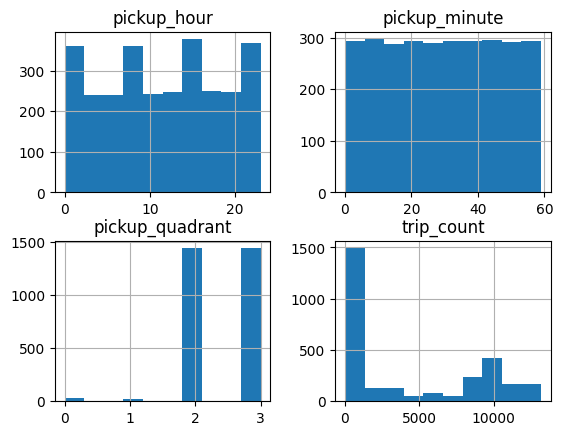

In [23]:
df.hist()

####Regresión Logistica

Definimos las características

In [60]:
features = df[['pickup_hour', 'pickup_minute', 'pickup_quadrant']]
target = df['trip_count']

Dividimos el conjunto en prueba y entrenamiento

In [61]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Creamos una instancia del modelo

In [62]:
model = LogisticRegression()

Entrenamos con los conjuntos x y y train

In [63]:
model.fit(X_train, y_train)

LogisticRegression()

Generamos una predicción sobre los datos de prueba 

In [64]:
y_pred = model.predict(X_test)

Calculamos la precisión del modelo

In [35]:
accuracy_score(y_test, y_pred)

0.027257240204429302